# TomoBear Benchmarking

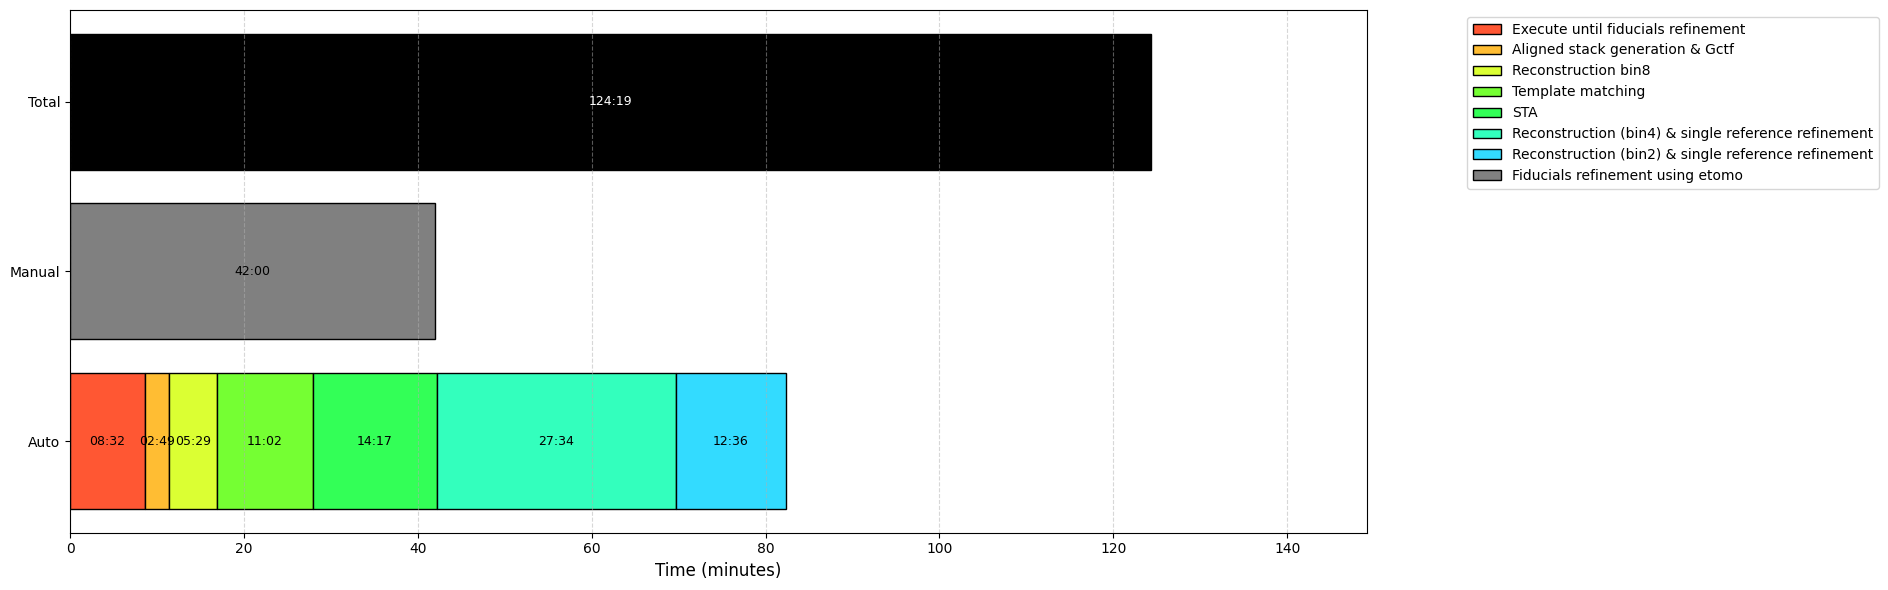

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Data

# Process names
process_names = [
    'Execute until fiducials refinement',
    'Aligned stack generation & Gctf',
    'Reconstruction bin8',
    'Template matching',
    'STA',
    'Reconstruction (bin4) & single reference refinement',
    'Reconstruction (bin2) & single reference refinement'
]

# Process times in minutes
process_times = [
    8 + 32/60,   # 8min 32s
    2 + 49/60,   # 2min 49s
    5 + 29/60,   # 5min 29s
    11 + 2/60,   # 11min 2s
    14 + 17/60,  # 14min 17s
    27 + 34/60,  # 27min 34s
    12 + 36/60   # 12min 36s
]

# Convert to numpy arrays
process_times = np.array(process_times)

# Compute cumulative times for left positions
cumulative_times = np.insert(np.cumsum(process_times[:-1]), 0, 0)

# Auto total time
auto_total_time = sum(process_times)

# Manual time
manual_time = 42  # in minutes

# Total time
total_time = auto_total_time + manual_time

# Bar labels and positions
bars = ['Auto', 'Manual', 'Total']
y_pos = [2, 1, 0]  # To have Auto on top

# Colors for Auto processes
colors = ['#FF5733', '#FFBD33', '#DBFF33', '#75FF33', '#33FF57', '#33FFBD', '#33DBFF']

# Create figure and axis
fig, ax = plt.subplots(figsize=(20, 6))

# Function to format time
def format_time(minutes):
    m = int(minutes)
    s = int(round((minutes - m) * 60))
    if s == 60:
        m += 1
        s = 0
    return f"{m:02d}:{s:02d}"

# Plot Auto bar segments
for i in range(len(process_times)):
    ax.barh(y=y_pos[0], width=process_times[i], left=cumulative_times[i], height=0.8, color=colors[i], edgecolor='black')
    
    # Calculate center position for the text
    center = cumulative_times[i] + process_times[i] / 2
    # Get the time label
    time_label = format_time(process_times[i])
    # Add text annotation
    ax.text(center, y_pos[0], time_label, va='center', ha='center', color='black', fontsize=9)

# Plot Manual bar
ax.barh(y=y_pos[1], width=manual_time, left=0, height=0.8, color='grey', edgecolor='black')

# Add text annotation for Manual
center_manual = manual_time / 2
time_label_manual = format_time(manual_time)
ax.text(center_manual, y_pos[1], time_label_manual, va='center', ha='center', color='black', fontsize=9)

# Plot Total bar
ax.barh(y=y_pos[2], width=total_time, left=0, height=0.8, color='black', edgecolor='black')

# Add text annotation for Total
center_total = total_time / 2
time_label_total = format_time(total_time)
ax.text(center_total, y_pos[2], time_label_total, va='center', ha='center', color='white', fontsize=9)

# Set y-ticks and labels
ax.set_yticks(y_pos)
ax.set_yticklabels(bars)
ax.invert_yaxis()  # Invert y-axis to have 'Auto' on top

# Set x-label
ax.set_xlabel('Time (minutes)', fontsize=12)

# Set x-limits
ax.set_xlim(0, total_time * 1.2)  # Add 10% margin

# Add legend in the top-right corner
legend_elements = [Patch(facecolor=colors[i], edgecolor='black', label=process_names[i]) for i in range(len(process_names))]
legend_elements.append(Patch(facecolor='grey', edgecolor='black', label='Fiducials refinement using etomo'))

ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.4, 1))

# Add grid
ax.grid(True, axis='x', linestyle='--', alpha=0.5)

# Adjust layout to make room for the legend
plt.tight_layout()

# Show plot
plt.show()


# MiLoPYP benchmarking

## EMPIAR-10304

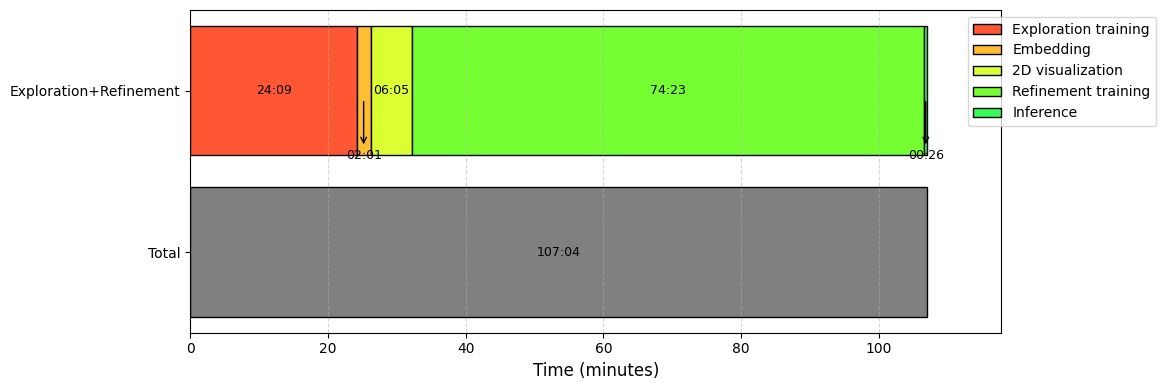

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Data for EMPIAR-10304

# Process names
process_names = [
    'Exploration training',
    'Embedding',
    '2D visualization',
    'Refinement training',
    'Inference'
]

# Process times in seconds
process_times = [
    24*60 + 9.488,        # 24m9.488s
    2*60 + 0.993,         # 2m0.993s
    6*60 + 5.125,         # 6m5.125s
    74*60 + 22.817,       # 74m22.817s
    26                    # 26s
]

# Convert times to minutes
process_times_minutes = [t / 60 for t in process_times]

# Convert to numpy arrays
process_times_minutes = np.array(process_times_minutes)

# Compute cumulative times for left positions
cumulative_times = np.insert(np.cumsum(process_times_minutes[:-1]), 0, 0)

# Total time
total_time = sum(process_times_minutes)

# Bar labels and positions
bars = ['Exploration+Refinement', 'Total']
y_pos = [1, 0]  # To have steps on top

# Colors for processes
colors = ['#FF5733', '#FFBD33', '#DBFF33', '#75FF33', '#33FF57']

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 4))

# Function to format time
def format_time(minutes):
    m = int(minutes)
    s = int(round((minutes - m) * 60))
    if s == 60:
        m += 1
        s = 0
    return f"{m:02d}:{s:02d}"

# Define a threshold for minimal bar width to adjust label position
threshold = total_time * 0.02  # You can adjust this value

# Vertical offset for labels (in axis units)
label_offset = 0.2  # Adjust as needed

# Plot Exploration+Refinement bar segments
for i in range(len(process_times_minutes)):
    bar_width = process_times_minutes[i]
    left = cumulative_times[i]
    ax.barh(y=y_pos[0], width=bar_width, left=left, height=0.8, color=colors[i], edgecolor='black')
    
    # Calculate center position for the text
    center = left + bar_width / 2
    # Get the time label
    time_label = format_time(process_times_minutes[i])
    
    # Decide where to place the label
    if bar_width >= threshold:
        # Place label inside the bar
        ax.text(center, y_pos[0], time_label, va='center', ha='center', color='black', fontsize=9)
    else:
        # Place label above the bar
        ax.text(center, y_pos[0] - 0.4, time_label, va='center', ha='center', color='black', fontsize=9)
        # Optionally, draw an arrow pointing to the bar
        ax.annotate('', xy=(center, y_pos[0] - 0.35), xytext=(center, y_pos[0] - 0.05),
                    arrowprops=dict(arrowstyle='->', color='black'))

# Plot Total bar
ax.barh(y=y_pos[1], width=total_time, left=0, height=0.8, color='grey', edgecolor='black')

# Add text annotation for Total
center_total = total_time / 2
time_label_total = format_time(total_time)
ax.text(center_total, y_pos[1], time_label_total, va='center', ha='center', color='black', fontsize=9)

# Set y-ticks and labels
ax.set_yticks(y_pos)
ax.set_yticklabels(bars)
ax.invert_yaxis()  # Invert y-axis to have steps on top

# Set x-label
ax.set_xlabel('Time (minutes)', fontsize=12)

# Set x-limits
ax.set_xlim(0, total_time * 1.1)  # Add 10% margin

# Adjust y-limits to provide space for labels above the bars
ax.set_ylim(-0.5, len(y_pos) - 0.5)

# Add legend in the top-right corner
legend_elements = [Patch(facecolor=colors[i], edgecolor='black', label=process_names[i]) for i in range(len(process_names))]
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.2, 1))

# Add grid
ax.grid(True, axis='x', linestyle='--', alpha=0.5)

# Adjust layout to make room for the legend
plt.tight_layout()

# Show plot
plt.show()


## chart2: RDY53


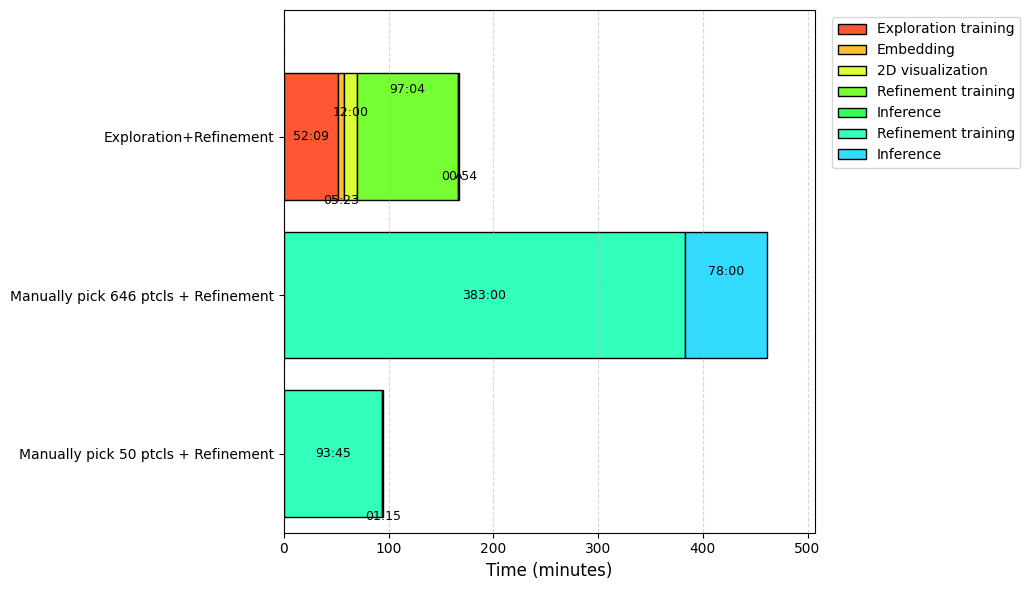

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Data for RDY53

# Define the methods
methods = [
    'Exploration+Refinement',
    'Manually pick 646 ptcls + Refinement',
    'Manually pick 50 ptcls + Refinement'
]

# Process names for Exploration+Refinement
process_names_exp_ref = [
    'Exploration training',
    'Embedding',
    '2D visualization',
    'Refinement training',
    'Inference'
]

# Times for Exploration+Refinement in seconds
process_times_exp_ref = [
    52*60 + 8.807,       # 52min8.807s
    5*60 + 23.326,       # 5min23.326s
    12*60 + 0.27,        # 12min0.27s
    97*60 + 4.286,       # 97m4.286s
    54                   # 54s
]

# Process names and times for Manually pick 646 ptcls + Refinement
process_names_manual_646 = [
    'Refinement training',
    'Inference'
]
process_times_manual_646 = [
    6*60 + 23,           # 6h23min -> 383 minutes
    1*60 + 18            # 1min18s
]

# Process names and times for Manually pick 50 ptcls + Refinement
process_names_manual_50 = [
    'Refinement training',
    'Inference'
]
process_times_manual_50 = [
    93 + 44.844/60,      # 93min44.844s
    (1*60 + 14.890)/60   # 1min14.890s
]

# Convert times to minutes
process_times_exp_ref_minutes = [t / 60 for t in process_times_exp_ref]
process_times_manual_646_minutes = [t for t in process_times_manual_646]
process_times_manual_50_minutes = process_times_manual_50

# Positions for the bars
y_pos = [2, 1, 0]  # To have the methods in order from top to bottom

# Colors for steps
colors_exp_ref = ['#FF5733', '#FFBD33', '#DBFF33', '#75FF33', '#33FF57']
colors_manual = ['#33FFBD', '#33DBFF']

# Calculate max total time for threshold
total_times = [
    sum(process_times_exp_ref_minutes),
    sum(process_times_manual_646_minutes),
    sum(process_times_manual_50_minutes)
]
max_total_time = max(total_times)

# Define threshold
threshold = max_total_time * 0.02  # Adjust as needed

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Function to format time
def format_time(minutes):
    m = int(minutes)
    s = int(round((minutes - m) * 60))
    if s == 60:
        m += 1
        s = 0
    return f"{m:02d}:{s:02d}"

# Function to adjust the label's y position to avoid overlap
def adjust_label_position(y, label_positions, y_offset):
    for pos in label_positions:
        if abs(y - pos) < y_offset * 0.9:
            y += y_offset
    label_positions.append(y)
    return y

# Vertical offset for labels
y_offset = 0.15  # Adjust as needed

# Plot Exploration+Refinement bar segments
cumulative_times_exp_ref = np.insert(np.cumsum(process_times_exp_ref_minutes[:-1]), 0, 0)
label_positions_exp_ref = []
for i in range(len(process_times_exp_ref_minutes)):
    bar_width = process_times_exp_ref_minutes[i]
    left = cumulative_times_exp_ref[i]
    ax.barh(y=y_pos[0], width=bar_width, left=left, height=0.8, color=colors_exp_ref[i], edgecolor='black')
    
    center = left + bar_width / 2
    time_label = format_time(bar_width)
    
    label_y = y_pos[0]
    if bar_width >= threshold:
        label_y = adjust_label_position(label_y, label_positions_exp_ref, y_offset)
        ax.text(center, label_y, time_label, va='center', ha='center', color='black', fontsize=9)
    else:
        label_y = adjust_label_position(y_pos[0] - 0.4, label_positions_exp_ref, y_offset)
        ax.text(center, label_y, time_label, va='center', ha='center', color='black', fontsize=9)
        ax.annotate('', xy=(center, label_y + 0.05), xytext=(center, y_pos[0] - 0.4 + 0.05),
                    arrowprops=dict(arrowstyle='->', color='black'))

# Plot Manually pick 646 ptcls + Refinement bar segments
cumulative_times_manual_646 = np.insert(np.cumsum(process_times_manual_646_minutes[:-1]), 0, 0)
label_positions_manual_646 = []
for i in range(len(process_times_manual_646_minutes)):
    bar_width = process_times_manual_646_minutes[i]
    left = cumulative_times_manual_646[i]
    ax.barh(y=y_pos[1], width=bar_width, left=left, height=0.8, color=colors_manual[i], edgecolor='black')
    
    center = left + bar_width / 2
    time_label = format_time(bar_width)
    
    label_y = y_pos[1]
    if bar_width >= threshold:
        label_y = adjust_label_position(label_y, label_positions_manual_646, y_offset)
        ax.text(center, label_y, time_label, va='center', ha='center', color='black', fontsize=9)
    else:
        label_y = adjust_label_position(y_pos[1] - 0.4, label_positions_manual_646, y_offset)
        ax.text(center, label_y, time_label, va='center', ha='center', color='black', fontsize=9)
        ax.annotate('', xy=(center, label_y + 0.05), xytext=(center, y_pos[1] - 0.4 + 0.05),
                    arrowprops=dict(arrowstyle='->', color='black'))

# Plot Manually pick 50 ptcls + Refinement bar segments
cumulative_times_manual_50 = np.insert(np.cumsum(process_times_manual_50_minutes[:-1]), 0, 0)
label_positions_manual_50 = []
for i in range(len(process_times_manual_50_minutes)):
    bar_width = process_times_manual_50_minutes[i]
    left = cumulative_times_manual_50[i]
    ax.barh(y=y_pos[2], width=bar_width, left=left, height=0.8, color=colors_manual[i], edgecolor='black')
    
    center = left + bar_width / 2
    time_label = format_time(bar_width)
    
    label_y = y_pos[2]
    if bar_width >= threshold:
        label_y = adjust_label_position(label_y, label_positions_manual_50, y_offset)
        ax.text(center, label_y, time_label, va='center', ha='center', color='black', fontsize=9)
    else:
        label_y = adjust_label_position(y_pos[2] - 0.4, label_positions_manual_50, y_offset)
        ax.text(center, label_y, time_label, va='center', ha='center', color='black', fontsize=9)
        ax.annotate('', xy=(center, label_y + 0.05), xytext=(center, y_pos[2] - 0.4 + 0.05),
                    arrowprops=dict(arrowstyle='->', color='black'))

# Set y-ticks and labels
ax.set_yticks(y_pos)
ax.set_yticklabels(methods)
ax.invert_yaxis()  # To have the methods in the specified order

# Adjust y-limits to provide space for labels above/below the bars
ax.set_ylim(-0.5, len(y_pos) - 0.5 + y_offset * 2)

# Set x-label
ax.set_xlabel('Time (minutes)', fontsize=12)

# Set x-limits
ax.set_xlim(0, max_total_time * 1.1)  # Add 10% margin

# Add legend
legend_elements = [Patch(facecolor=colors_exp_ref[i], edgecolor='black', label=process_names_exp_ref[i]) for i in range(len(process_names_exp_ref))]
legend_elements_manual = [Patch(facecolor=colors_manual[i], edgecolor='black', label=process_names_manual_646[i]) for i in range(len(process_names_manual_646))]
legend_elements.extend(legend_elements_manual)
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.4, 1))

# Add grid
ax.grid(True, axis='x', linestyle='--', alpha=0.5)

# Adjust layout to make room for the legend
plt.tight_layout()

# Show plot
plt.show()


## chart3: 229E


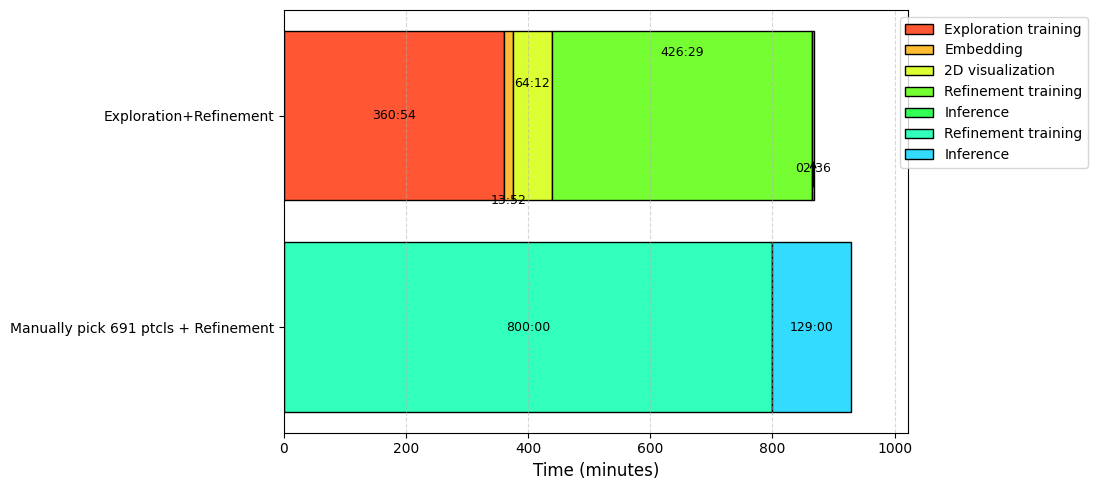

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Data for 229E

# Define the methods
methods = [
    'Exploration+Refinement',
    'Manually pick 691 ptcls + Refinement'
]

# Process names for Exploration+Refinement
process_names_exp_ref = [
    'Exploration training',
    'Embedding',
    '2D visualization',
    'Refinement training',
    'Inference'
]

# Times for Exploration+Refinement in seconds
process_times_exp_ref = [
    360*60 + 53.502,     # 360min53.502s
    13*60 + 52.083,      # 13min52.083s
    64*60 + 11.777,      # 64min11.777s
    426*60 + 29.008,     # 426min29.008s
    2*60 + 35.840        # 2min35.840s
]

# Process names and times for Manually pick 691 ptcls + Refinement
process_names_manual = [
    'Refinement training',
    'Inference'
]
process_times_manual = [
    13*60 + 20,          # 13h20min -> 800 minutes
    2*60 + 9             # 2min09s
]

# Convert times to minutes
process_times_exp_ref_minutes = [t / 60 for t in process_times_exp_ref]
process_times_manual_minutes = [t for t in process_times_manual]

# Positions for the bars
y_pos = [1, 0]  # To have the methods in order from top to bottom

# Colors for steps
colors_exp_ref = ['#FF5733', '#FFBD33', '#DBFF33', '#75FF33', '#33FF57']
colors_manual = ['#33FFBD', '#33DBFF']

# Calculate max total time for threshold
total_times = [
    sum(process_times_exp_ref_minutes),
    sum(process_times_manual_minutes)
]
max_total_time = max(total_times)

# Define threshold and label offset
threshold = max_total_time * 0.02  # Adjust as needed
label_offset = 0.3  # Adjust as needed

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 5))

# Function to format time
def format_time(minutes):
    m = int(minutes)
    s = int(round((minutes - m) * 60))
    if s == 60:
        m += 1
        s = 0
    return f"{m:02d}:{s:02d}"

# Function to adjust the label's y position to avoid overlap
def adjust_label_position(y, label_positions, y_offset):
    for pos in label_positions:
        if abs(y - pos) < y_offset * 0.9:
            y += y_offset
    label_positions.append(y)
    return y

# 在绘制条形图的循环中:
label_positions_exp_ref = []
# Plot Exploration+Refinement bar segments
cumulative_times_exp_ref = np.insert(np.cumsum(process_times_exp_ref_minutes[:-1]), 0, 0)
for i in range(len(process_times_exp_ref_minutes)):
    bar_width = process_times_exp_ref_minutes[i]
    left = cumulative_times_exp_ref[i]
    ax.barh(y=y_pos[0], width=bar_width, left=left, height=0.8, color=colors_exp_ref[i], edgecolor='black')
    
    center = left + bar_width / 2
    time_label = format_time(bar_width)
    label_y = y_pos[0]
    if bar_width >= threshold:
        label_y = adjust_label_position(label_y, label_positions_exp_ref, y_offset)
        ax.text(center, label_y, time_label, va='center', ha='center', color='black', fontsize=9)
    else:
        label_y = adjust_label_position(y_pos[0] - 0.4, label_positions_exp_ref, y_offset)
        ax.text(center, label_y, time_label, va='center', ha='center', color='black', fontsize=9)
        ax.annotate('', xy=(center, label_y + 0.05), xytext=(center, y_pos[0] - 0.4 + 0.05),
                    arrowprops=dict(arrowstyle='->', color='black'))

# Plot Manually pick 691 ptcls + Refinement bar segments
cumulative_times_manual = np.insert(np.cumsum(process_times_manual_minutes[:-1]), 0, 0)
for i in range(len(process_times_manual_minutes)):
    bar_width = process_times_manual_minutes[i]
    left = cumulative_times_manual[i]
    ax.barh(y=y_pos[1], width=bar_width, left=left, height=0.8, color=colors_manual[i], edgecolor='black')
    
    center = left + bar_width / 2
    time_label = format_time(bar_width)
    
    if bar_width >= threshold:
        ax.text(center, y_pos[1], time_label, va='center', ha='center', color='black', fontsize=9)
    else:
        # Place label above the bar
        ax.text(center, y_pos[1] - label_offset, time_label, va='center', ha='center', color='black', fontsize=9)
        ax.annotate('', xy=(center, y_pos[1] - label_offset + 0.05), xytext=(center, y_pos[1] - 0.4),
                    arrowprops=dict(arrowstyle='->', color='black'))

# Set y-ticks and labels
ax.set_yticks(y_pos)
ax.set_yticklabels(methods)
ax.invert_yaxis()  # To have the methods in the specified order

# Adjust y-limits to provide space for labels above the bars
ax.set_ylim(-0.5, len(y_pos) - 0.5)

# Set x-label
ax.set_xlabel('Time (minutes)', fontsize=12)

# Set x-limits
ax.set_xlim(0, max_total_time * 1.1)  # Add 10% margin

# Add legend
legend_elements = [Patch(facecolor=colors_exp_ref[i], edgecolor='black', label=process_names_exp_ref[i]) for i in range(len(process_names_exp_ref))]
legend_elements_manual = [Patch(facecolor=colors_manual[i], edgecolor='black', label=process_names_manual[i]) for i in range(len(process_names_manual))]
legend_elements.extend(legend_elements_manual)
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.3, 1))

# Add grid
ax.grid(True, axis='x', linestyle='--', alpha=0.5)

# Adjust layout to make room for the legend
plt.tight_layout()

# Show plot
plt.show()


## chart4: Comparison of Exploration+Refinement Times


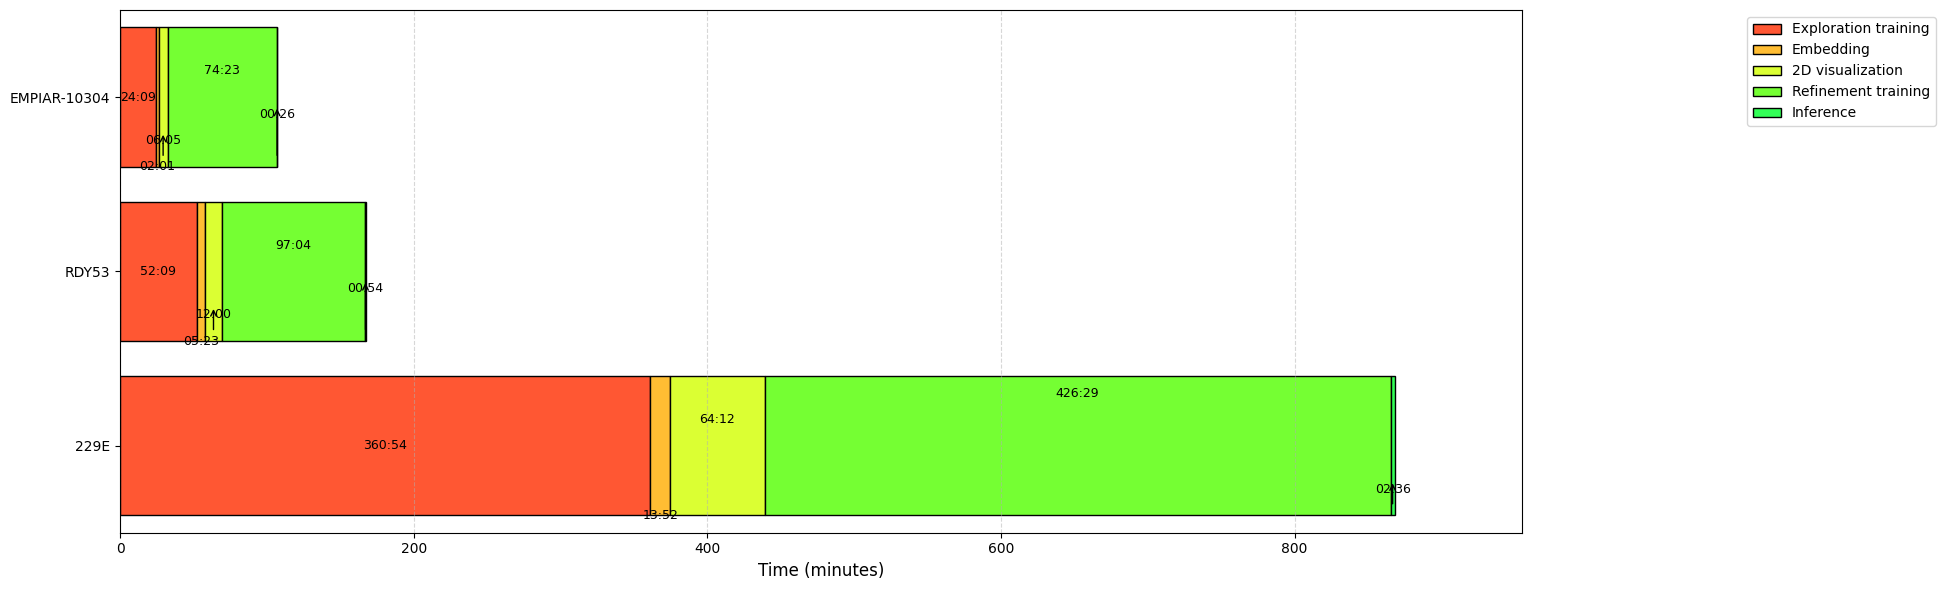

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Data for EMPIAR-10304
process_names = [
    'Exploration training',
    'Embedding',
    '2D visualization',
    'Refinement training',
    'Inference'
]

process_times_10304 = [
    (24*60 + 9.488) / 60,        # Convert to minutes
    (2*60 + 0.993) / 60,
    (6*60 + 5.125) / 60,
    (74*60 + 22.817) / 60,
    26 / 60
]

# Data for RDY53
process_times_RDY53 = [
    (52*60 + 8.807) / 60,
    (5*60 + 23.326) / 60,
    (12*60 + 0.27) / 60,
    (97*60 + 4.286) / 60,
    54 / 60
]

# Data for 229E
process_times_229E = [
    (360*60 + 53.502) / 60,
    (13*60 + 52.083) / 60,
    (64*60 + 11.777) / 60,
    (426*60 + 29.008) / 60,
    (2*60 + 35.840) / 60
]

datasets = ['EMPIAR-10304', 'RDY53', '229E']
process_times_list = [process_times_10304, process_times_RDY53, process_times_229E]

# Positions for the bars
y_pos = [2, 1, 0]  # EMPIAR-10304 on top

# Colors for steps (same colors for same steps)
colors_steps = ['#FF5733', '#FFBD33', '#DBFF33', '#75FF33', '#33FF57']

# Calculate max total time for threshold
total_times = [sum(times) for times in process_times_list]
max_total_time = max(total_times)

# Define threshold and label offset
threshold = max_total_time * 0.02  # Adjust as needed
label_offset = 0.3  # Adjust as needed

# Create figure and axis
fig, ax = plt.subplots(figsize=(20, 6))

# Function to format time
def format_time(minutes):
    m = int(minutes)
    s = int(round((minutes - m) * 60))
    if s == 60:
        m += 1
        s = 0
    return f"{m:02d}:{s:02d}"

# Function to adjust the label's y position to avoid overlap
def adjust_label_position(y, label_positions, y_offset):
    for pos in label_positions:
        if abs(y - pos) < y_offset * 0.9:
            y += y_offset
    label_positions.append(y)
    return y

# 在绘制条形图的循环中:
label_positions_exp_ref = []

# Plot bars for each dataset
for idx, times in enumerate(process_times_list):
    label_positions = []
    cumulative_times = np.insert(np.cumsum(times[:-1]), 0, 0)
    for i in range(len(times)):
        bar_width = times[i]
        left = cumulative_times[i]
        ax.barh(y=y_pos[idx], width=bar_width, left=left, height=0.8, color=colors_steps[i], edgecolor='black')
        
        center = left + bar_width / 2
        time_label = format_time(bar_width)
        
        label_y = y_pos[idx]
        if bar_width >= threshold:
            label_y = adjust_label_position(label_y, label_positions, y_offset)
            ax.text(center, label_y, time_label, va='center', ha='center', color='black', fontsize=9)
        else:
            label_y = adjust_label_position(y_pos[idx] - 0.4, label_positions, y_offset)
            ax.text(center, label_y, time_label, va='center', ha='center', color='black', fontsize=9)
            ax.annotate('', xy=(center, label_y + 0.05), xytext=(center, y_pos[idx] - 0.4 + 0.05),
                        arrowprops=dict(arrowstyle='->', color='black'))

# Set y-ticks and labels
ax.set_yticks(y_pos)
ax.set_yticklabels(datasets)
ax.invert_yaxis()  # To have the datasets in the specified order

# Adjust y-limits to provide space for labels above the bars
ax.set_ylim(-0.5, len(y_pos) - 0.5)

# Set x-label
ax.set_xlabel('Time (minutes)', fontsize=12)

# Set x-limits
ax.set_xlim(0, max_total_time * 1.1)  # Add 10% margin

# Add legend
legend_elements = [Patch(facecolor=colors_steps[i], edgecolor='black', label=process_names[i]) for i in range(len(process_names))]
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.3, 1))

# Add grid
ax.grid(True, axis='x', linestyle='--', alpha=0.5)

# Adjust layout to make room for the legend
plt.tight_layout()

# Show plot
plt.show()


## chart5: Comparison of Manually Picked Particles + Refinement


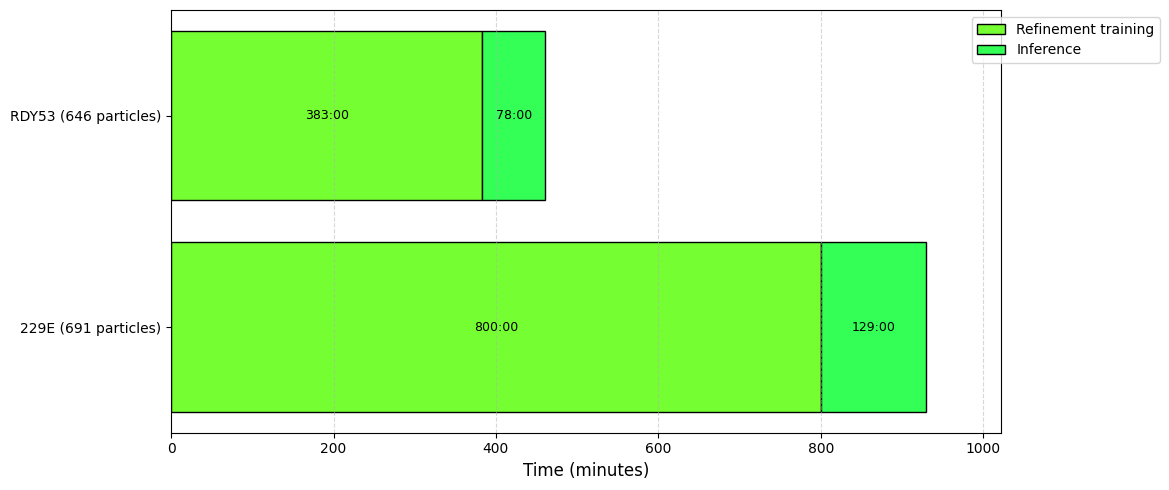

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Data for RDY53
dataset_RDY53 = 'RDY53 (646 particles)'
process_names_RDY53 = ['Refinement training', 'Inference']
process_times_RDY53 = [
    6*60 + 23,       # 6h23min -> 383 minutes
    (1*60 + 18)      # 1min18s
]

# Data for 229E
dataset_229E = '229E (691 particles)'
process_names_229E = ['Refinement training', 'Inference']
process_times_229E = [
    13*60 + 20,      # 13h20min -> 800 minutes
    2*60 + 9         # 2min09s
]

# Convert times to minutes
process_times_RDY53_minutes = [t for t in process_times_RDY53]
process_times_229E_minutes = [t for t in process_times_229E]

# Datasets
datasets = [dataset_RDY53, dataset_229E]
process_times_list = [process_times_RDY53_minutes, process_times_229E_minutes]

# Positions for the bars
y_pos = [1, 0]  # RDY53 on top

# Colors for steps
colors_steps = ['#75FF33', '#33FF57']  # Two colors for two steps

# Calculate max total time for threshold
total_times = [sum(times) for times in process_times_list]
max_total_time = max(total_times)

# Define threshold and label offset
threshold = max_total_time * 0.02  # Adjust as needed
label_offset = 0.3  # Adjust as needed

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 5))

# Function to format time
def format_time(minutes):
    m = int(minutes)
    s = int(round((minutes - m) * 60))
    if s == 60:
        m += 1
        s = 0
    return f"{m:02d}:{s:02d}"


# Plot bars for each dataset
for idx, times in enumerate(process_times_list):
    cumulative_times = np.insert(np.cumsum(times[:-1]), 0, 0)
    for i in range(len(times)):
        bar_width = times[i]
        left = cumulative_times[i]
        ax.barh(y=y_pos[idx], width=bar_width, left=left, height=0.8, color=colors_steps[i], edgecolor='black')
        
        center = left + bar_width / 2
        time_label = format_time(bar_width)
        
        if bar_width >= threshold:
            ax.text(center, y_pos[idx], time_label, va='center', ha='center', color='black', fontsize=9)
        else:
            # Place label above the bar
            ax.text(center, y_pos[idx] - label_offset, time_label, va='center', ha='center', color='black', fontsize=9)
            ax.annotate('', xy=(center, y_pos[idx] - label_offset + 0.05), xytext=(center, y_pos[idx] - 0.4),
                        arrowprops=dict(arrowstyle='->', color='black'))

# Set y-ticks and labels
ax.set_yticks(y_pos)
ax.set_yticklabels(datasets)
ax.invert_yaxis()  # To have the datasets in the specified order

# Adjust y-limits to provide space for labels above the bars
ax.set_ylim(-0.5, len(y_pos) - 0.5)

# Set x-label
ax.set_xlabel('Time (minutes)', fontsize=12)

# Set x-limits
ax.set_xlim(0, max_total_time * 1.1)  # Add 10% margin

# Add legend
legend_elements = [Patch(facecolor=colors_steps[i], edgecolor='black', label=process_names_RDY53[i]) for i in range(len(process_names_RDY53))]
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.2, 1))

# Add grid
ax.grid(True, axis='x', linestyle='--', alpha=0.5)

# Adjust layout to make room for the legend
plt.tight_layout()

# Show plot
plt.show()
